**Data Loading**

In [261]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

In [262]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [263]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [264]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Preprocessing**

In [265]:
# Data cleaning
columns_drop = ['Cabin', 'PassengerId', 'Ticket', 'Name']
data = data.drop(columns=columns_drop, axis=1, errors='ignore')


data.isnull().sum()
# Feature engineering
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
FamilySize,0


In [267]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,1.904602
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


**Split data**

In [268]:
from sklearn.model_selection import train_test_split
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



**Data preprocessing pipeline**

In [269]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, recall_score, precision_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#Feature selection
numerical_feature = X.select_dtypes(include=['int64', 'float64']).columns
categorical_feature = X.select_dtypes(include=['object']).columns

#Pipeline
cat_pipeline = Pipeline(steps=[
    ('onhot', OneHotEncoder(handle_unknown='ignore'))
])

# combine
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_pipeline, categorical_feature)
])


**Dùng Decision tree huấn luyện mô hình**

In [276]:
model_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion = 'gini', max_depth=20, random_state = 42))
])

model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)


**Evaluation**

In [277]:
acc = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
print(acc)
print(precision)
print(recall)
print(f1)

0.776536312849162
0.7377049180327869
0.6521739130434783
0.6923076923076923


**Confusion matix cho decision tree**

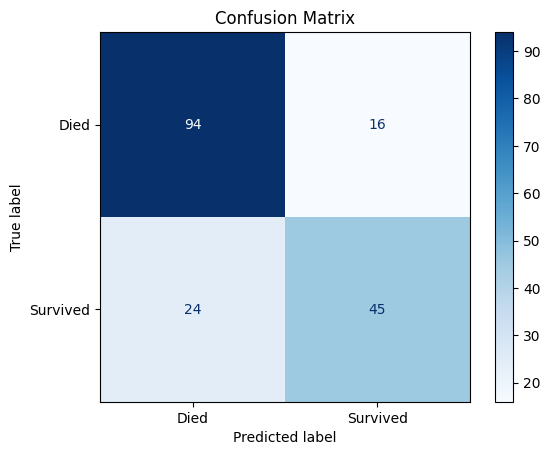

In [272]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Tạo và hiển thị confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Died', 'Survived'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

**Dùng RandomForest để huấn luyện mô hình**

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=10000, max_features=3, max_depth=20, random_state=42))
])
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


**Evaluation**

In [274]:
acc = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
print(acc)
print(precision)
print(recall)
print(f1)

0.776536312849162
0.7377049180327869
0.6521739130434783
0.6923076923076923


**Confusion maxtix cho Random Forest Classifier**

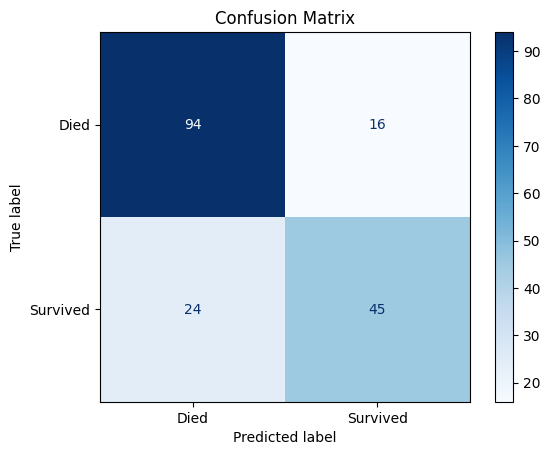

In [275]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Tạo và hiển thị confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Died', 'Survived'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()